In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
data_20406 = pd.read_csv('Resources/U20406.csv')
data_20306 = pd.read_csv('Resources/U20306.csv')
nondurable = pd.read_csv('Resources/nondurable_no_commas.csv')
durable = pd.read_csv('Resources/Durable-no-commas.csv')
# Remove white space from the left of the category names
nondurable['Consumption Category '] = nondurable['Consumption Category '].str.lstrip()
durable['Category'] = durable['Category'].str.lstrip()
# Display table
#nondurable.head()
durable.head()

,Line,Category,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,3,Durable goods,1489338,1476868,1517158,1520517,1539628,1547807,1546742,1550766,...,1554348,1567879,1552496,1368958,1199629,1548706,1686563,1725182,1741183,1792575
1,4,Motor vehicles and parts,505405,493199,526990,520059,526272,528448,521973,522425,...,531252,528205,514181,411296,367912,527916,558120,573695,585999,621299
2,5,New motor vehicles (55),270156,265172,284806,280681,288288,291327,285982,285932,...,294780,294499,281780,218323,205918,280194,284637,296850,306311,334157
3,6,New autos,63697,56758,57492,59422,54490,57520,53191,53766,...,56344,52768,50961,37935,29443,40283,42026,48762,49953,53258
4,7,New domestic autos,47043,40898,42353,44414,39057,41172,37958,39130,...,42835,39269,37692,29809,23131,29548,31416,37762,38988,41450


In [3]:
# Separate durable goods into years
data19 = nondurable.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
#data19.dtypes

data20 = nondurable.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
#data20.dtypes

# Separate non-durable goods into years
dur_data19 = durable.loc[:, ['Category', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
dur_data19.dtypes

dur_data20 = durable.loc[:, ['Category', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
dur_data20.dtypes

Category    object
2020M01      int64
2020M02      int64
2020M03      int64
2020M04      int64
2020M05      int64
2020M06      int64
2020M07      int64
2020M08      int64
2020M09      int64
dtype: object

In [4]:
# Compare alcohols
booze19 = data19.loc[(data19['Consumption Category '] == 'Spirits') | (data19['Consumption Category '] == 'Wine') | (data19['Consumption Category '] == 'Beer'), :]
booze19 = booze19.set_index('Consumption Category ')

booze20 = data20.loc[(data19['Consumption Category '] == 'Spirits') | (data19['Consumption Category '] == 'Wine') | (data19['Consumption Category '] == 'Beer'), :]
booze20 = booze20.set_index('Consumption Category ')

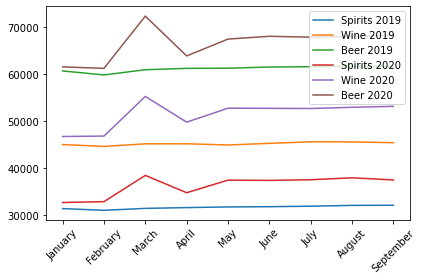

In [5]:
x_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

spirits19, = plt.plot(x_values, booze19.loc['Spirits', :], label='Spirits 2019')
wine19, = plt.plot(x_values, booze19.loc['Wine', :], label='Wine 2019')
beer19, = plt.plot(x_values, booze19.loc['Beer', :], label='Beer 2019')

spirits20, = plt.plot(x_values, booze20.loc['Spirits', :], label='Spirits 2020')
wine20, = plt.plot(x_values, booze20.loc['Wine', :], label='Wine 2020')
beer20, = plt.plot(x_values, booze20.loc['Beer', :], label='Beer 2020')

plt.legend(handles=[spirits19, wine19, beer19, spirits20, wine20, beer20], loc="best")
plt.xticks(rotation=45)
plt.tight_layout()

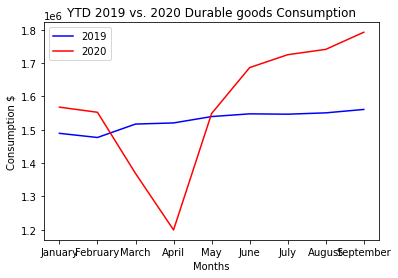

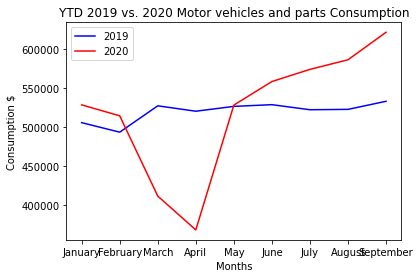

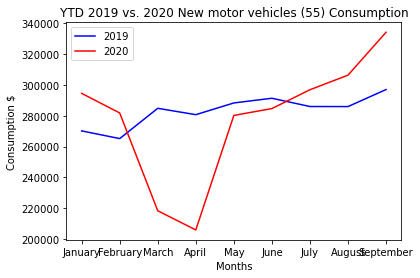

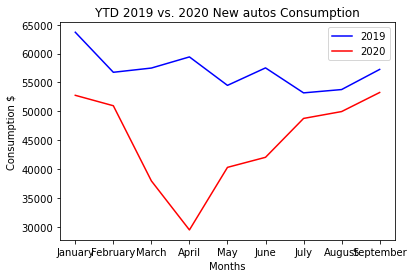

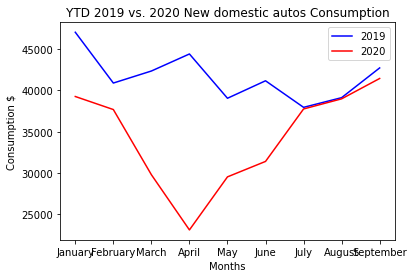

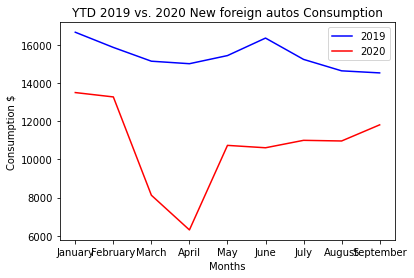

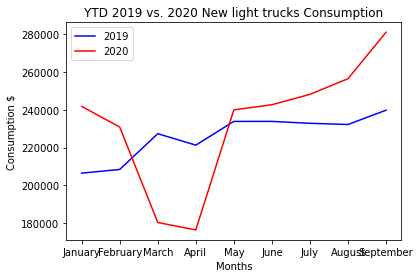

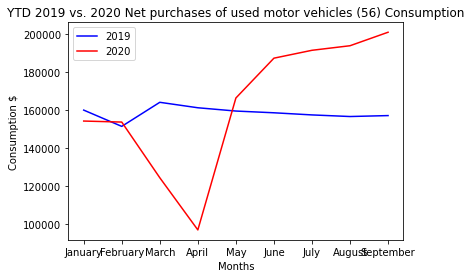

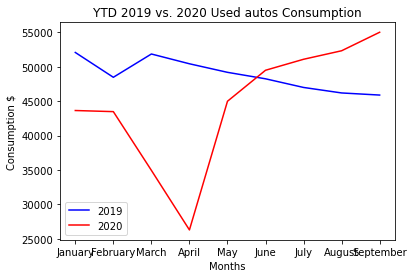

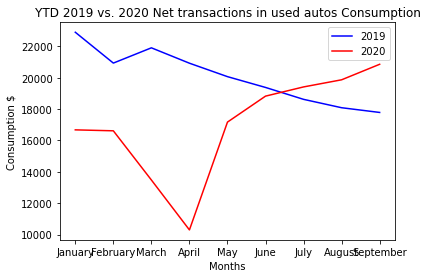

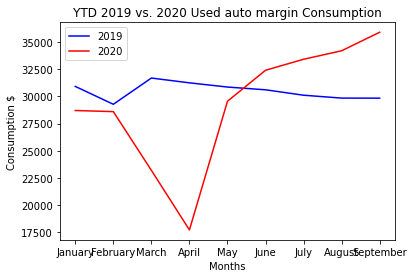

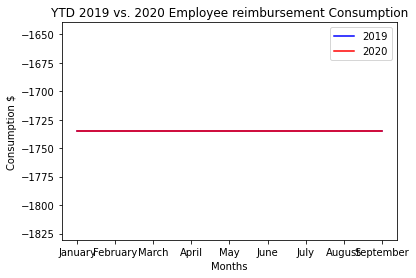

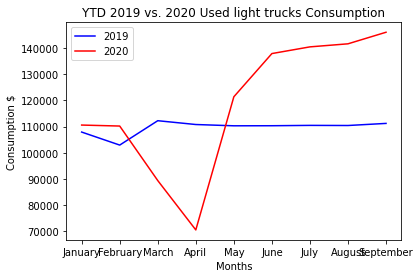

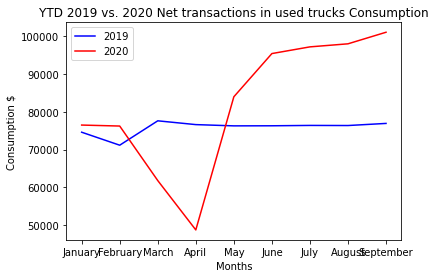

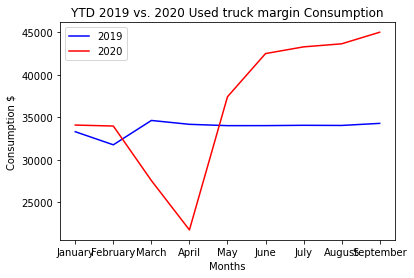

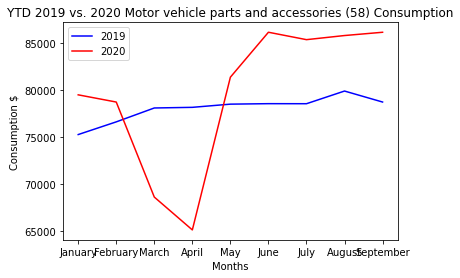

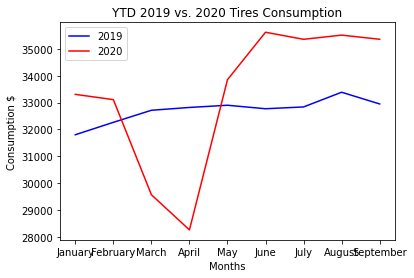

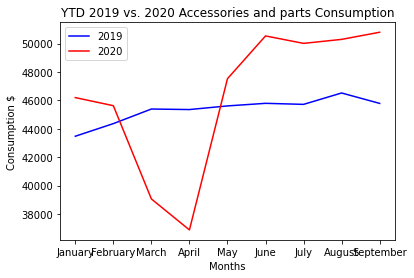

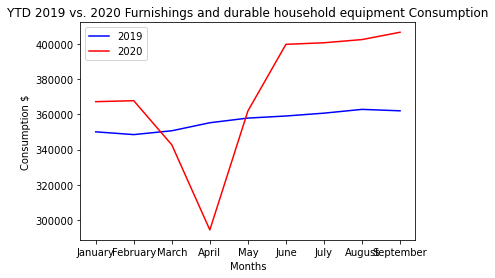

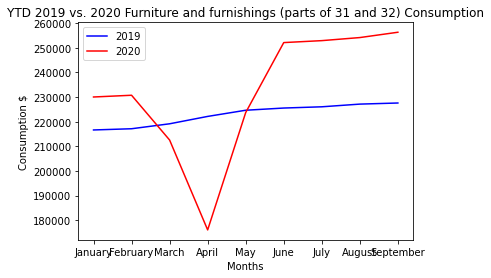

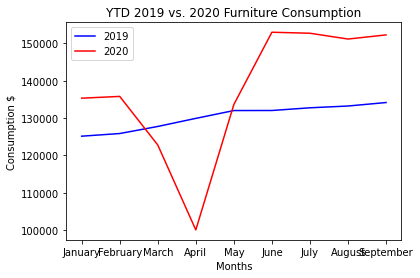

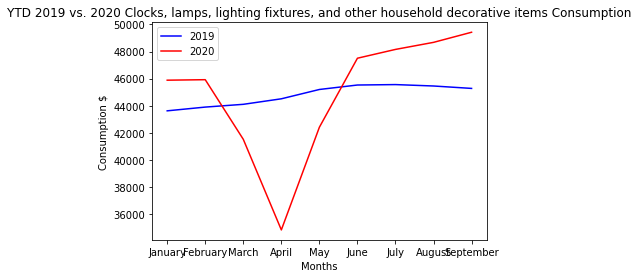

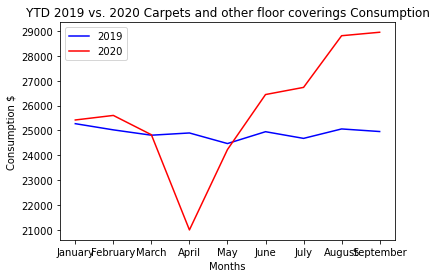

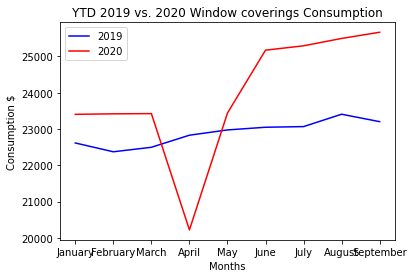

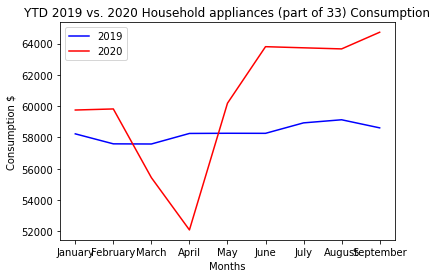

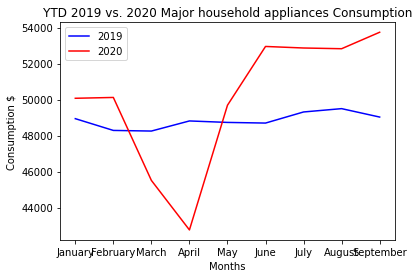

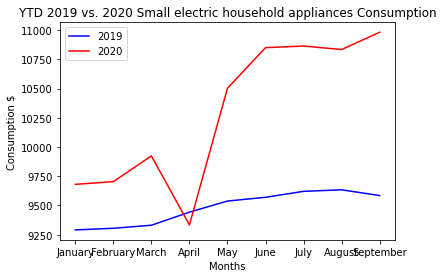

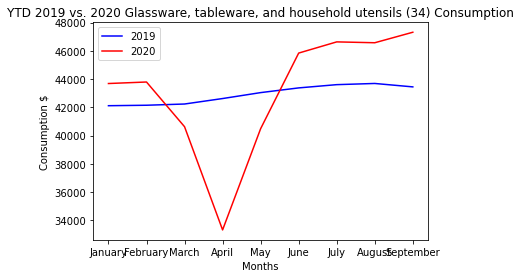

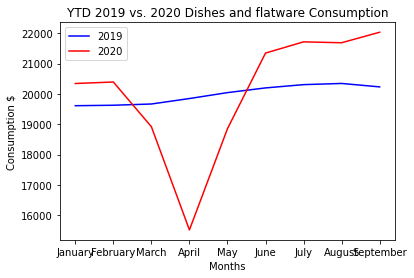

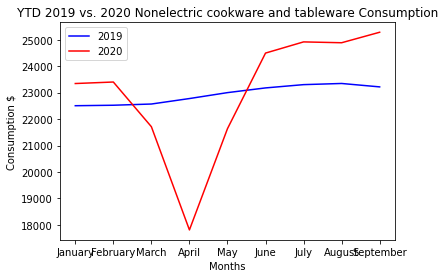

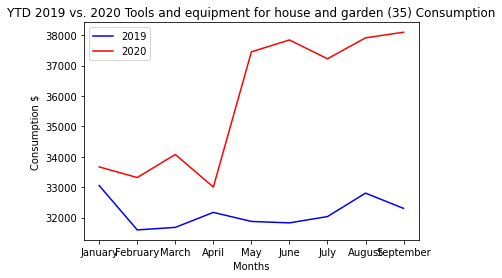

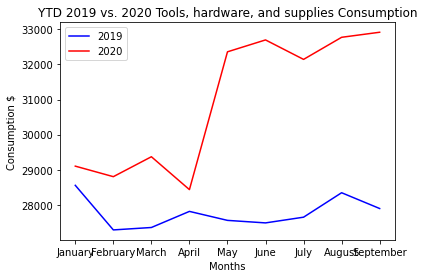

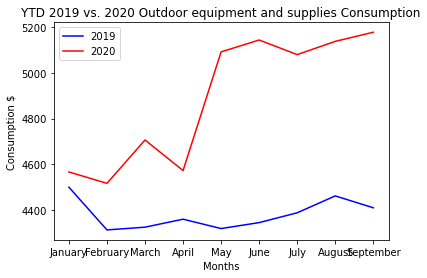

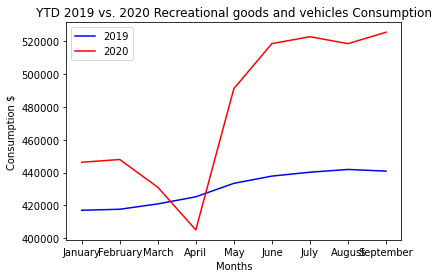

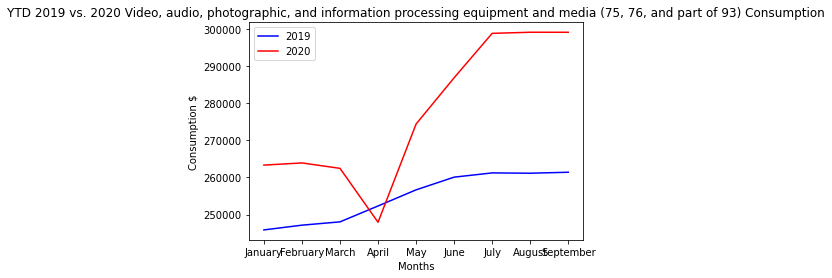

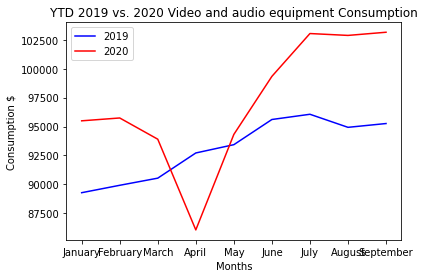

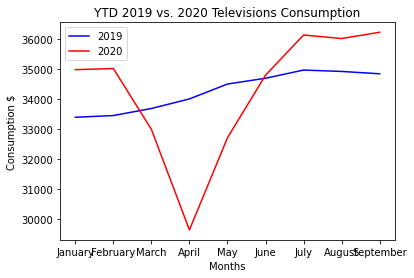

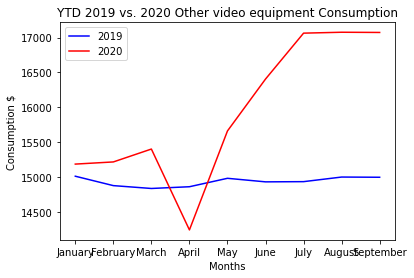

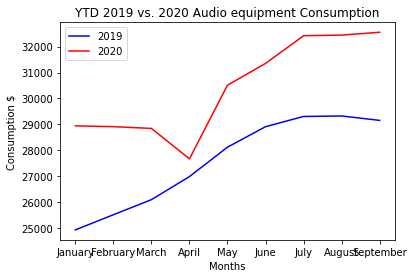

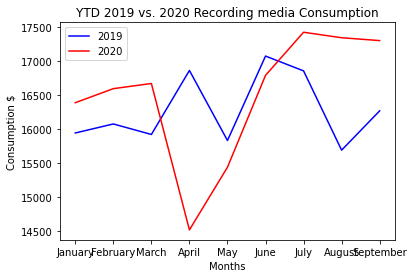

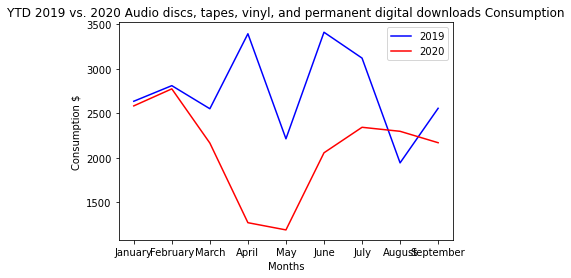

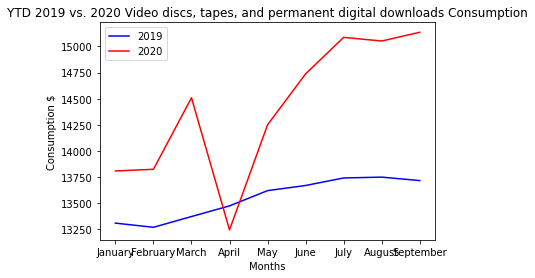

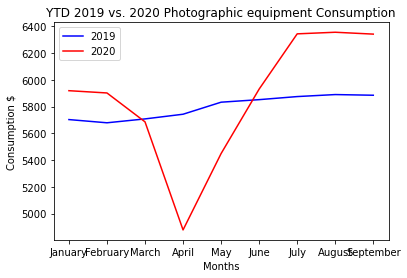

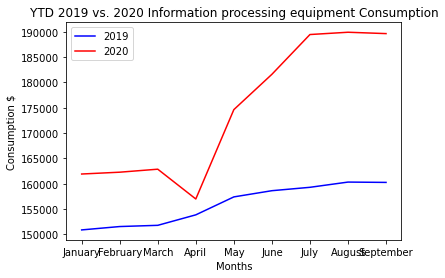

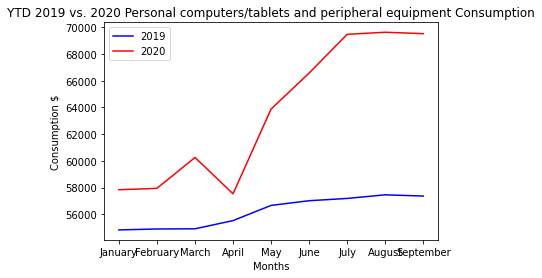

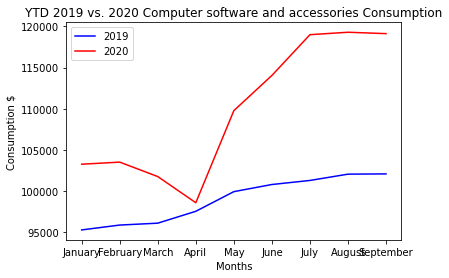

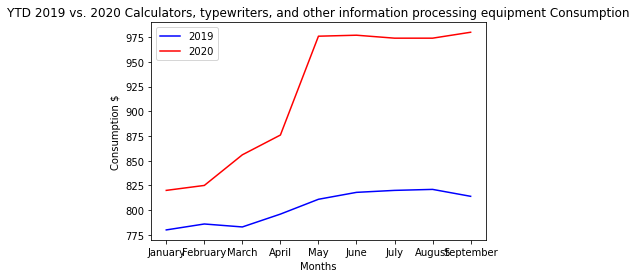

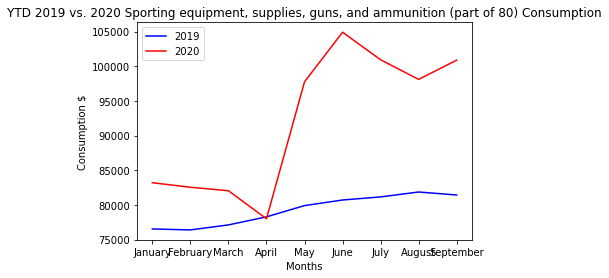

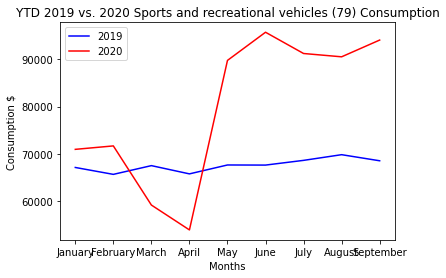

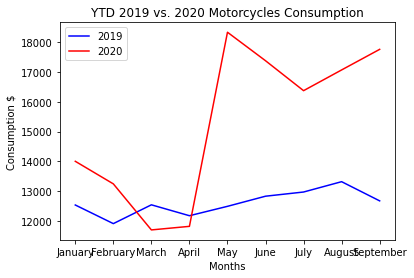

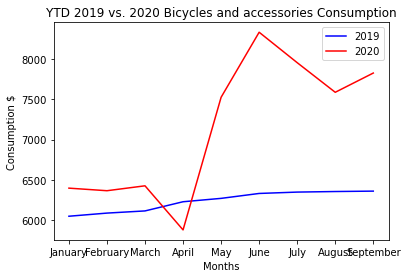

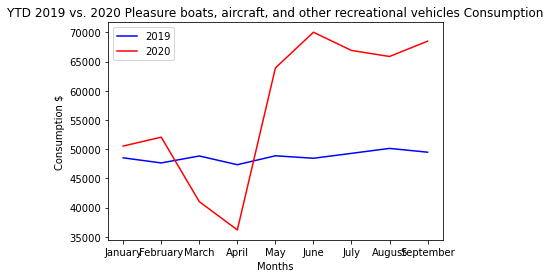

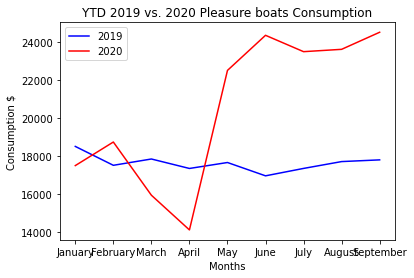

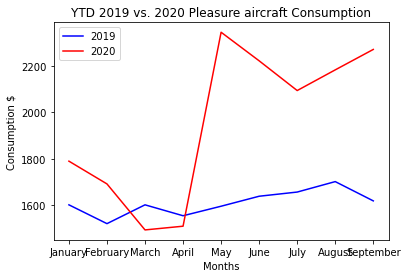

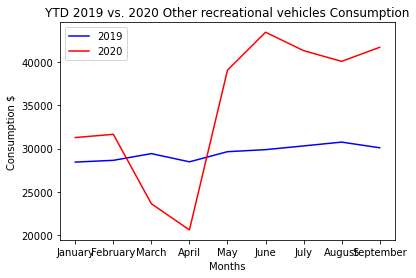

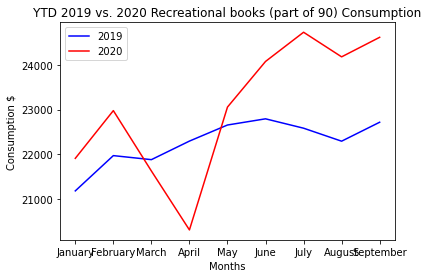

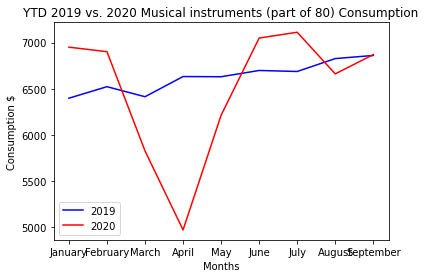

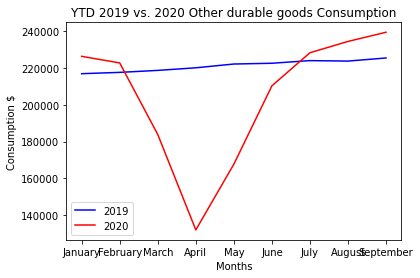

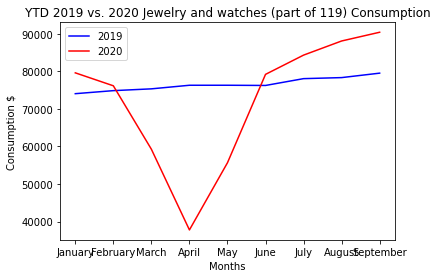

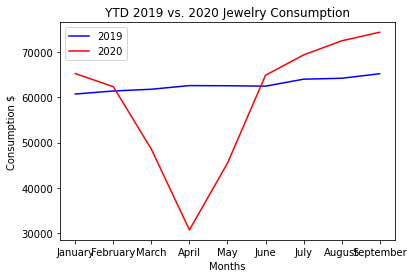

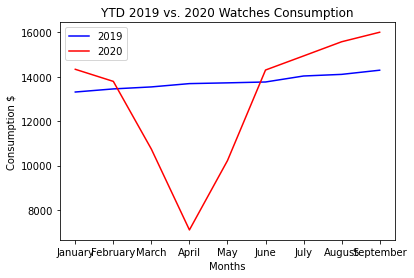

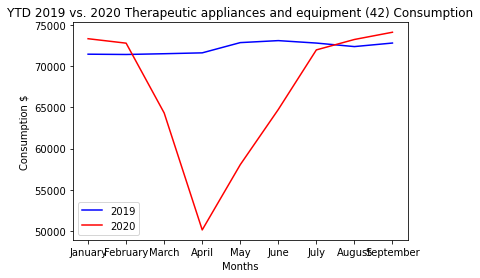

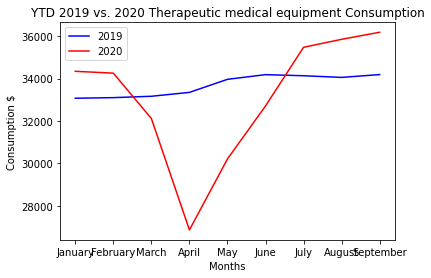

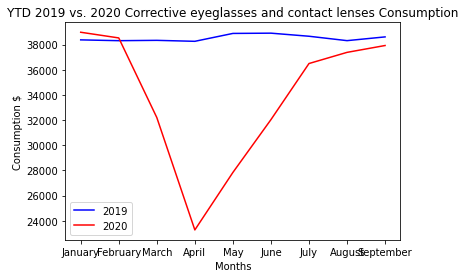

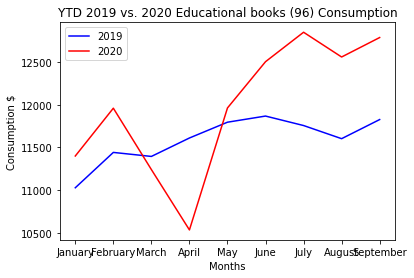

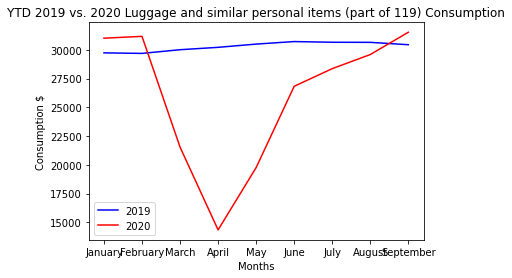

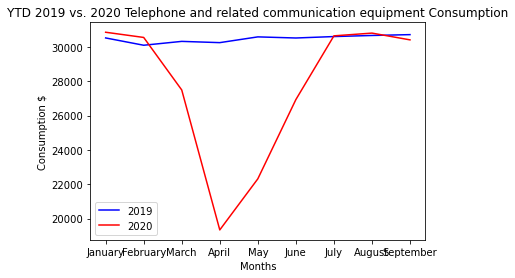

In [9]:
# Compare recreational goods
# dur_data19 = dur_data19.set_index('Category')
# dur_data20 = dur_data20.set_index('Category')

#list(dur_data19.index)
cat19 = dur_data19.index[0]
cat20 = dur_data20.index[0]

ytd19 = dur_data19.loc[cat19, :]
ytd20 = dur_data20.loc[cat20, :]

#dur_data19.columns

for index in dur_data19.index:
    ytd19 = dur_data19.loc[index, :]
    ytd20 = dur_data20.loc[index, :]
    
    plt.plot(x_values, ytd19, color='blue', label='2019')
    plt.plot(x_values, ytd20, color='red', label='2020')
    plt.legend(['2019','2020'], loc='best')
    plt.title(f'YTD 2019 vs. 2020 {index} Consumption')
    plt.xlabel('Months')
    plt.ylabel('Consumption $')
    plt.show()